# Read processing
<hr>

#### Configuring software

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = '/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/anaconda3/bin' # <- insert current paths into this string
path += ':/home/LC/kollad01/gray_fox/programs/2bRAD_denovo'
path += ':/home/LC/kollad01/gray_fox/programs/bowtie2-2.5.3-sra-linux-x86_64'
path += ':/home/LC/kollad01/.local/bin'
os.environ['PATH'] = path
os.environ['WORKDIR'] = './gray_fox'
os.chdir('/home/LC/kollad01/gray_fox')

| Software   | Link |  Version | Use |
| ------- | ---- | -----------|------------|
| 2bRAD_denovo | https://github.com/z0on/2bRAD_denovo | 2/15/24 | Demultiplexing, etc. |
| cutadapt |https://cutadapt.readthedocs.io/en/stable/ | 4.6 | Quality filtering|
| ANGSD | https://github.com/ANGSD/angsd | 0.941-22-gc877e7f 3/4/24 | genotype calling |
| htslib | https://github.com/samtools/htslib | 3/4/24 | with ANGSD |
| samtools | https://sourceforge.net/projects/samtools/files/samtools/ |1.19.2 | convert bam to sam |

In [17]:
%%bash
head -20 ./data/raw/lane1/10_S10_L001_R1_001.fastq 

@A01171:215:HY3M2DRX3:1:1101:1362:1000 1:N:0:TAGCTT+NCAAGT
GGGTCAAAGTGTTAGACGAATGGTGTGCCCCAATGAGGCAGTGTAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTAGCTTATCTCGTATGCCGTCT
+
FFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
@A01171:215:HY3M2DRX3:1:1101:1561:1000 1:N:0:TAGCTT+NCAAGT
TGGTTAACCACATCGACGAAACTTATGCCGCCATTTTCCAGCTTAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTAGCTTATCTCGTATGCCGTCT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
@A01171:215:HY3M2DRX3:1:1101:1777:1000 1:N:0:TAGCTT+NCAAGT
ACGACATGTTCCTGCCCGAGTAGGATGCCTTCTGGGCGCTAGTGAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTAGCTTATCTCGTATGCCGTCT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFF
@A01171:215:HY3M2DRX3:1:1101:2139:1000 1:N:0:TAGCTT+NCAAGT
GAGTCACCTGCTCCAAGCACTTGCCTCGGACAGACAGCCTGACTAGATCGGAAGAGCACACGTCTGAACTCCAGTCACTAGCTTATCTCGTATGCCGTCT
+
FFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

### Total raw reads

In [5]:
%%bash
DATA_DIRECTORY="./data/raw/lane1"
./scripts/raw_count.sh $DATA_DIRECTORY

Total raw reads: 961310534


In [6]:
%%time
%%bash
DATA_DIRECTORY="./data/raw/lane2"
./scripts/raw_count.sh $DATA_DIRECTORY

Total raw reads: 952481621
CPU times: user 8.74 ms, sys: 8.03 ms, total: 16.8 ms
Wall time: 3min 13s


In [7]:
961310534 + 952481621

1913792155

*1.9 Billion raw reads*

### Counting raw reads with particular barcode sequences

### Demultiplexing / Removing PCR duplicates

In [52]:
%%time
%%bash
cd data/raw/lane1
2bRAD_trim_launch_dedup.pl .fastq > trims
bash trims

33_S33_L001_R1_001_AAAC: goods: 1632 ; dups: 213
33_S33_L001_R1_001_AACT: goods: 2673 ; dups: 905
33_S33_L001_R1_001_AATC: goods: 2158 ; dups: 247
33_S33_L001_R1_001_ACAA: goods: 2400 ; dups: 212
33_S33_L001_R1_001_ACAC: goods: 3775 ; dups: 821
33_S33_L001_R1_001_ACAG: goods: 8795 ; dups: 1695
33_S33_L001_R1_001_ACCA: goods: 352948 ; dups: 652454
33_S33_L001_R1_001_ACCC: goods: 1709 ; dups: 329
33_S33_L001_R1_001_ACCG: goods: 2946 ; dups: 621
33_S33_L001_R1_001_ACTT: goods: 1280 ; dups: 365
33_S33_L001_R1_001_AGAC: goods: 480888 ; dups: 1203146
33_S33_L001_R1_001_AGAG: goods: 2078 ; dups: 524
33_S33_L001_R1_001_AGAT: goods: 1397 ; dups: 425
33_S33_L001_R1_001_AGCG: goods: 3270 ; dups: 926
33_S33_L001_R1_001_AGGC: goods: 2429 ; dups: 752
33_S33_L001_R1_001_AGGG: goods: 333972 ; dups: 280236
33_S33_L001_R1_001_AGTA: goods: 1984 ; dups: 620
33_S33_L001_R1_001_AGTC: goods: 6257 ; dups: 1739
33_S33_L001_R1_001_AGTG: goods: 654986 ; dups: 1197523
33_S33_L001_R1_001_ATAC: goods: 3364 ; dups: 

22_S22_L001_R1_001_AGTG: goods: 319289 ; dups: 572136
22_S22_L001_R1_001_ATAC: goods: 1956 ; dups: 258
22_S22_L001_R1_001_CAAC: goods: 3220 ; dups: 494
22_S22_L001_R1_001_CACC: goods: 1601 ; dups: 383
22_S22_L001_R1_001_CATC: goods: 400797 ; dups: 932149
22_S22_L001_R1_001_CCAC: goods: 6586 ; dups: 2439
22_S22_L001_R1_001_CGTC: goods: 6621 ; dups: 2570
22_S22_L001_R1_001_CTAC: goods: 570653 ; dups: 1817128
22_S22_L001_R1_001_CTAT: goods: 1597 ; dups: 560
22_S22_L001_R1_001_CTGC: goods: 2321 ; dups: 697
22_S22_L001_R1_001_GAAT: goods: 2768 ; dups: 341
22_S22_L001_R1_001_GACA: goods: 1796 ; dups: 378
22_S22_L001_R1_001_GACC: goods: 4605 ; dups: 1747
22_S22_L001_R1_001_GACT: goods: 667713 ; dups: 2336349
22_S22_L001_R1_001_GAGT: goods: 1352 ; dups: 147
22_S22_L001_R1_001_GATT: goods: 1349 ; dups: 534
22_S22_L001_R1_001_GCCA: goods: 1828 ; dups: 506
22_S22_L001_R1_001_GCCT: goods: 1027 ; dups: 235
22_S22_L001_R1_001_GCGT: goods: 2312 ; dups: 566
22_S22_L001_R1_001_GCTT: goods: 201049 ; dup

14_S14_L001_R1_001_AGGC: goods: 2461 ; dups: 572
14_S14_L001_R1_001_AGTA: goods: 3775 ; dups: 1394
14_S14_L001_R1_001_AGTC: goods: 5883 ; dups: 1325
14_S14_L001_R1_001_AGTG: goods: 1104540 ; dups: 3894601
14_S14_L001_R1_001_AGTT: goods: 1926 ; dups: 245
14_S14_L001_R1_001_ATAC: goods: 2598 ; dups: 289
14_S14_L001_R1_001_ATGA: goods: 1154 ; dups: 343
14_S14_L001_R1_001_ATGT: goods: 1759 ; dups: 488
14_S14_L001_R1_001_ATTG: goods: 1711 ; dups: 141
14_S14_L001_R1_001_CAAC: goods: 3356 ; dups: 561
14_S14_L001_R1_001_CACC: goods: 3277 ; dups: 1099
14_S14_L001_R1_001_CATA: goods: 1608 ; dups: 246
14_S14_L001_R1_001_CATC: goods: 700021 ; dups: 2213441
14_S14_L001_R1_001_CATT: goods: 2087 ; dups: 685
14_S14_L001_R1_001_CCAC: goods: 5669 ; dups: 1889
14_S14_L001_R1_001_CCAG: goods: 1657 ; dups: 440
14_S14_L001_R1_001_CGTC: goods: 9063 ; dups: 3457
14_S14_L001_R1_001_CTAC: goods: 439028 ; dups: 979711
14_S14_L001_R1_001_CTAT: goods: 1002 ; dups: 319
14_S14_L001_R1_001_CTGC: goods: 1453 ; dups: 3

3_S3_L001_R1_001_GACC: goods: 2497 ; dups: 461
3_S3_L001_R1_001_GACT: goods: 449159 ; dups: 815079
3_S3_L001_R1_001_GAGA: goods: 1643 ; dups: 195
3_S3_L001_R1_001_GAGT: goods: 1889 ; dups: 227
3_S3_L001_R1_001_GATT: goods: 1478 ; dups: 279
3_S3_L001_R1_001_GCCA: goods: 2396 ; dups: 726
3_S3_L001_R1_001_GCCT: goods: 2075 ; dups: 573
3_S3_L001_R1_001_GCGA: goods: 2063 ; dups: 544
3_S3_L001_R1_001_GCGT: goods: 3923 ; dups: 1101
3_S3_L001_R1_001_GCTC: goods: 2561 ; dups: 739
3_S3_L001_R1_001_GCTT: goods: 470813 ; dups: 916024
3_S3_L001_R1_001_GGAC: goods: 2550 ; dups: 660
3_S3_L001_R1_001_GGCT: goods: 1621 ; dups: 316
3_S3_L001_R1_001_GGTG: goods: 2577 ; dups: 613
3_S3_L001_R1_001_GTAT: goods: 1055 ; dups: 341
3_S3_L001_R1_001_GTGA: goods: 452405 ; dups: 900283
3_S3_L001_R1_001_GTGC: goods: 3611 ; dups: 1138
3_S3_L001_R1_001_GTGG: goods: 3353 ; dups: 1066
3_S3_L001_R1_001_GTGT: goods: 545181 ; dups: 1472750
3_S3_L001_R1_001_GTTA: goods: 1013 ; dups: 74
3_S3_L001_R1_001_GTTT: goods: 1787 ; 

29_S29_L001_R1_001_GACC: goods: 4164 ; dups: 926
29_S29_L001_R1_001_GACG: goods: 1165 ; dups: 231
29_S29_L001_R1_001_GACT: goods: 757161 ; dups: 1823243
29_S29_L001_R1_001_GAGT: goods: 2363 ; dups: 304
29_S29_L001_R1_001_GATT: goods: 2769 ; dups: 470
29_S29_L001_R1_001_GCAT: goods: 1379 ; dups: 161
29_S29_L001_R1_001_GCCA: goods: 1351 ; dups: 295
29_S29_L001_R1_001_GCCT: goods: 3574 ; dups: 687
29_S29_L001_R1_001_GCGT: goods: 5801 ; dups: 1509
29_S29_L001_R1_001_GCTC: goods: 4141 ; dups: 923
29_S29_L001_R1_001_GCTG: goods: 1375 ; dups: 256
29_S29_L001_R1_001_GCTT: goods: 827244 ; dups: 1787353
29_S29_L001_R1_001_GGAC: goods: 1877 ; dups: 504
29_S29_L001_R1_001_GGCT: goods: 3293 ; dups: 786
29_S29_L001_R1_001_GGTG: goods: 3619 ; dups: 834
29_S29_L001_R1_001_GTAT: goods: 1236 ; dups: 394
29_S29_L001_R1_001_GTCT: goods: 1245 ; dups: 201
29_S29_L001_R1_001_GTGA: goods: 163131 ; dups: 239474
29_S29_L001_R1_001_GTGC: goods: 3753 ; dups: 1055
29_S29_L001_R1_001_GTGG: goods: 1859 ; dups: 469
2

6_S6_L001_R1_001_ACAA: goods: 4243 ; dups: 640
6_S6_L001_R1_001_ACAC: goods: 2848 ; dups: 594
6_S6_L001_R1_001_ACCA: goods: 711430 ; dups: 2216570
6_S6_L001_R1_001_ACCC: goods: 1347 ; dups: 372
6_S6_L001_R1_001_ACCG: goods: 4380 ; dups: 1586
6_S6_L001_R1_001_ACCT: goods: 2298 ; dups: 755
6_S6_L001_R1_001_ACTA: goods: 1732 ; dups: 676
6_S6_L001_R1_001_AGAA: goods: 1262 ; dups: 241
6_S6_L001_R1_001_AGAC: goods: 752251 ; dups: 2620439
6_S6_L001_R1_001_AGAG: goods: 2002 ; dups: 315
6_S6_L001_R1_001_AGAT: goods: 3135 ; dups: 1179
6_S6_L001_R1_001_AGCG: goods: 2915 ; dups: 861
6_S6_L001_R1_001_AGGC: goods: 4423 ; dups: 1614
6_S6_L001_R1_001_AGTA: goods: 2112 ; dups: 740
6_S6_L001_R1_001_AGTC: goods: 3253 ; dups: 850
6_S6_L001_R1_001_AGTG: goods: 666326 ; dups: 1639211
6_S6_L001_R1_001_AGTT: goods: 1184 ; dups: 224
6_S6_L001_R1_001_ATAC: goods: 4969 ; dups: 703
6_S6_L001_R1_001_ATCA: goods: 1331 ; dups: 503
6_S6_L001_R1_001_ATGA: goods: 1217 ; dups: 380
6_S6_L001_R1_001_ATGT: goods: 1452 ; du

7_S7_L001_R1_001_GCGA: goods: 1426 ; dups: 439
7_S7_L001_R1_001_GCGT: goods: 4695 ; dups: 1482
7_S7_L001_R1_001_GCTC: goods: 4514 ; dups: 1892
7_S7_L001_R1_001_GCTG: goods: 1122 ; dups: 348
7_S7_L001_R1_001_GCTT: goods: 654566 ; dups: 1780310
7_S7_L001_R1_001_GGAC: goods: 3309 ; dups: 656
7_S7_L001_R1_001_GGCT: goods: 4966 ; dups: 1209
7_S7_L001_R1_001_GGTG: goods: 2895 ; dups: 756
7_S7_L001_R1_001_GTAC: goods: 1026 ; dups: 199
7_S7_L001_R1_001_GTAT: goods: 1134 ; dups: 380
7_S7_L001_R1_001_GTCT: goods: 1785 ; dups: 324
7_S7_L001_R1_001_GTGA: goods: 328502 ; dups: 648380
7_S7_L001_R1_001_GTGC: goods: 4335 ; dups: 1452
7_S7_L001_R1_001_GTGG: goods: 2711 ; dups: 969
7_S7_L001_R1_001_GTGT: goods: 627002 ; dups: 1631533
7_S7_L001_R1_001_GTTT: goods: 2387 ; dups: 527
7_S7_L001_R1_001_TAAG: goods: 1236 ; dups: 135
7_S7_L001_R1_001_TACT: goods: 1324 ; dups: 129
7_S7_L001_R1_001_TATC: goods: 2217 ; dups: 611
7_S7_L001_R1_001_TCAA: goods: 3668 ; dups: 1260
7_S7_L001_R1_001_TCAC: goods: 791375 ;

11_S11_L001_R1_001_TCAC: goods: 348030 ; dups: 660116
11_S11_L001_R1_001_TCAG: goods: 892973 ; dups: 2351074
11_S11_L001_R1_001_TCAT: goods: 2295 ; dups: 465
11_S11_L001_R1_001_TCGC: goods: 1455 ; dups: 448
11_S11_L001_R1_001_TCGG: goods: 4803 ; dups: 1619
11_S11_L001_R1_001_TCTG: goods: 1113 ; dups: 283
11_S11_L001_R1_001_TGAC: goods: 2338 ; dups: 574
11_S11_L001_R1_001_TGCC: goods: 1628 ; dups: 435
11_S11_L001_R1_001_TGTC: goods: 433255 ; dups: 835994
11_S11_L001_R1_001_TGTG: goods: 2936 ; dups: 673
11_S11_L001_R1_001_TGTT: goods: 1465 ; dups: 397
11_S11_L001_R1_001_TTAC: goods: 1049 ; dups: 300
11_S11_L001_R1_001_TTAG: goods: 1438 ; dups: 423

11_S11_L001_R1_001: total goods : 6857378 ; total dups : 18910338
12_S12_L001_R1_001_AATC: goods: 1134 ; dups: 107
12_S12_L001_R1_001_AATG: goods: 2924 ; dups: 799
12_S12_L001_R1_001_ACAC: goods: 2470 ; dups: 547
12_S12_L001_R1_001_ACAG: goods: 1222 ; dups: 174
12_S12_L001_R1_001_ACCA: goods: 197258 ; dups: 384289
12_S12_L001_R1_001_ACCG: good

17_S17_L001_R1_001_GGCT: goods: 3444 ; dups: 863
17_S17_L001_R1_001_GGGG: goods: 1381 ; dups: 94
17_S17_L001_R1_001_GGGT: goods: 18502 ; dups: 2279
17_S17_L001_R1_001_GGTG: goods: 2450 ; dups: 539
17_S17_L001_R1_001_GTGA: goods: 358140 ; dups: 630045
17_S17_L001_R1_001_GTGC: goods: 2137 ; dups: 502
17_S17_L001_R1_001_GTGG: goods: 1961 ; dups: 477
17_S17_L001_R1_001_GTGT: goods: 353212 ; dups: 541104
17_S17_L001_R1_001_GTTT: goods: 2072 ; dups: 492
17_S17_L001_R1_001_TACT: goods: 1013 ; dups: 74
17_S17_L001_R1_001_TATC: goods: 2360 ; dups: 746
17_S17_L001_R1_001_TCAA: goods: 2503 ; dups: 817
17_S17_L001_R1_001_TCAC: goods: 493443 ; dups: 1039921
17_S17_L001_R1_001_TCAG: goods: 774571 ; dups: 1836593
17_S17_L001_R1_001_TCAT: goods: 2312 ; dups: 567
17_S17_L001_R1_001_TCCG: goods: 124481 ; dups: 40754
17_S17_L001_R1_001_TCGC: goods: 2219 ; dups: 621
17_S17_L001_R1_001_TCGG: goods: 4774 ; dups: 1210
17_S17_L001_R1_001_TCTT: goods: 1054 ; dups: 106
17_S17_L001_R1_001_TGAC: goods: 1815 ; dup

15_S15_L001_R1_001_GCTG: goods: 1329 ; dups: 335
15_S15_L001_R1_001_GCTT: goods: 615857 ; dups: 1573739
15_S15_L001_R1_001_GGAC: goods: 4108 ; dups: 1061
15_S15_L001_R1_001_GGCT: goods: 3250 ; dups: 894
15_S15_L001_R1_001_GGGT: goods: 1247 ; dups: 109
15_S15_L001_R1_001_GGTG: goods: 3499 ; dups: 868
15_S15_L001_R1_001_GTAT: goods: 2076 ; dups: 677
15_S15_L001_R1_001_GTCT: goods: 1414 ; dups: 311
15_S15_L001_R1_001_GTGA: goods: 380395 ; dups: 841457
15_S15_L001_R1_001_GTGC: goods: 6211 ; dups: 1690
15_S15_L001_R1_001_GTGG: goods: 4410 ; dups: 967
15_S15_L001_R1_001_GTGT: goods: 1027749 ; dups: 2857133
15_S15_L001_R1_001_GTTA: goods: 1075 ; dups: 25
15_S15_L001_R1_001_GTTT: goods: 3503 ; dups: 524
15_S15_L001_R1_001_TAAG: goods: 1076 ; dups: 88
15_S15_L001_R1_001_TACT: goods: 1042 ; dups: 104
15_S15_L001_R1_001_TATC: goods: 2004 ; dups: 531
15_S15_L001_R1_001_TCAA: goods: 3398 ; dups: 1154
15_S15_L001_R1_001_TCAC: goods: 632658 ; dups: 1730605
15_S15_L001_R1_001_TCAG: goods: 852723 ; dup

21_S21_L001_R1_001_CGTC: goods: 5383 ; dups: 1706
21_S21_L001_R1_001_CTAC: goods: 603634 ; dups: 1683307
21_S21_L001_R1_001_CTAT: goods: 1357 ; dups: 366
21_S21_L001_R1_001_CTGC: goods: 2314 ; dups: 618
21_S21_L001_R1_001_GAAT: goods: 1190 ; dups: 107
21_S21_L001_R1_001_GACC: goods: 1860 ; dups: 601
21_S21_L001_R1_001_GACT: goods: 374123 ; dups: 873530
21_S21_L001_R1_001_GCCA: goods: 2045 ; dups: 508
21_S21_L001_R1_001_GCGT: goods: 1702 ; dups: 297
21_S21_L001_R1_001_GCTT: goods: 170904 ; dups: 268522
21_S21_L001_R1_001_GGCT: goods: 1450 ; dups: 399
21_S21_L001_R1_001_GGTG: goods: 1312 ; dups: 251
21_S21_L001_R1_001_GTGA: goods: 170849 ; dups: 189651
21_S21_L001_R1_001_GTGC: goods: 1412 ; dups: 264
21_S21_L001_R1_001_GTGG: goods: 1015 ; dups: 164
21_S21_L001_R1_001_GTGT: goods: 344940 ; dups: 523512
21_S21_L001_R1_001_TATC: goods: 1960 ; dups: 546
21_S21_L001_R1_001_TCAA: goods: 1560 ; dups: 457
21_S21_L001_R1_001_TCAC: goods: 556190 ; dups: 1340520
21_S21_L001_R1_001_TCAG: goods: 5098

23_S23_L001_R1_001_ACAC: goods: 1324 ; dups: 162
23_S23_L001_R1_001_ACCA: goods: 150325 ; dups: 234262
23_S23_L001_R1_001_AGAC: goods: 38371 ; dups: 41243
23_S23_L001_R1_001_AGTC: goods: 1841 ; dups: 285
23_S23_L001_R1_001_AGTG: goods: 201058 ; dups: 291198
23_S23_L001_R1_001_ATAC: goods: 1437 ; dups: 115
23_S23_L001_R1_001_CAAC: goods: 2171 ; dups: 228
23_S23_L001_R1_001_CATC: goods: 94764 ; dups: 133640
23_S23_L001_R1_001_CCAC: goods: 4827 ; dups: 1131
23_S23_L001_R1_001_CGTC: goods: 2958 ; dups: 838
23_S23_L001_R1_001_CTAC: goods: 578699 ; dups: 1677123
23_S23_L001_R1_001_CTAT: goods: 1141 ; dups: 344
23_S23_L001_R1_001_CTGC: goods: 2223 ; dups: 524
23_S23_L001_R1_001_GACC: goods: 1134 ; dups: 254
23_S23_L001_R1_001_GACT: goods: 271418 ; dups: 553972
23_S23_L001_R1_001_GCTT: goods: 39675 ; dups: 47704
23_S23_L001_R1_001_GGCT: goods: 1014 ; dups: 233
23_S23_L001_R1_001_GTGA: goods: 20171 ; dups: 22405
23_S23_L001_R1_001_GTGT: goods: 104758 ; dups: 124797
23_S23_L001_R1_001_TCAC: good

10_S10_L001_R1_001_TATC: goods: 1785 ; dups: 489
10_S10_L001_R1_001_TCAA: goods: 3461 ; dups: 1131
10_S10_L001_R1_001_TCAC: goods: 734908 ; dups: 1971430
10_S10_L001_R1_001_TCAG: goods: 1007813 ; dups: 2921685
10_S10_L001_R1_001_TCAT: goods: 6612 ; dups: 1876
10_S10_L001_R1_001_TCGC: goods: 3622 ; dups: 1300
10_S10_L001_R1_001_TCGG: goods: 5885 ; dups: 1600
10_S10_L001_R1_001_TCTC: goods: 1089 ; dups: 258
10_S10_L001_R1_001_TCTG: goods: 1492 ; dups: 344
10_S10_L001_R1_001_TCTT: goods: 5732 ; dups: 707
10_S10_L001_R1_001_TGAC: goods: 4926 ; dups: 1144
10_S10_L001_R1_001_TGTC: goods: 85321 ; dups: 110071
10_S10_L001_R1_001_TGTG: goods: 2492 ; dups: 587
10_S10_L001_R1_001_TTAC: goods: 2156 ; dups: 646
10_S10_L001_R1_001_TTAG: goods: 1950 ; dups: 550
10_S10_L001_R1_001_TTGT: goods: 1006 ; dups: 177

10_S10_L001_R1_001: total goods : 9575130 ; total dups : 40472461
36_S36_L001_R1_001_AATC: goods: 1938 ; dups: 102
36_S36_L001_R1_001_ACAA: goods: 1195 ; dups: 76
36_S36_L001_R1_001_ACAC: goods

16_S16_L001_R1_001_GCGT: goods: 10032 ; dups: 3528
16_S16_L001_R1_001_GCTA: goods: 1107 ; dups: 166
16_S16_L001_R1_001_GCTC: goods: 5165 ; dups: 1987
16_S16_L001_R1_001_GCTG: goods: 1587 ; dups: 418
16_S16_L001_R1_001_GCTT: goods: 695803 ; dups: 1959237
16_S16_L001_R1_001_GGAC: goods: 2878 ; dups: 721
16_S16_L001_R1_001_GGCT: goods: 2852 ; dups: 924
16_S16_L001_R1_001_GGGT: goods: 1505 ; dups: 145
16_S16_L001_R1_001_GGTG: goods: 2497 ; dups: 597
16_S16_L001_R1_001_GTAT: goods: 2608 ; dups: 1062
16_S16_L001_R1_001_GTCT: goods: 1525 ; dups: 307
16_S16_L001_R1_001_GTGA: goods: 236165 ; dups: 380327
16_S16_L001_R1_001_GTGC: goods: 10057 ; dups: 3709
16_S16_L001_R1_001_GTGG: goods: 4077 ; dups: 1111
16_S16_L001_R1_001_GTGT: goods: 1088978 ; dups: 4175399
16_S16_L001_R1_001_GTTT: goods: 4590 ; dups: 796
16_S16_L001_R1_001_TATC: goods: 1970 ; dups: 490
16_S16_L001_R1_001_TCAA: goods: 1652 ; dups: 487
16_S16_L001_R1_001_TCAC: goods: 640317 ; dups: 1673694
16_S16_L001_R1_001_TCAG: goods: 252384

1_S1_L001_R1_001_TCGG: goods: 2262 ; dups: 545
1_S1_L001_R1_001_TGAC: goods: 2716 ; dups: 793
1_S1_L001_R1_001_TGCC: goods: 1233 ; dups: 371
1_S1_L001_R1_001_TGTC: goods: 334892 ; dups: 633167
1_S1_L001_R1_001_TGTT: goods: 1032 ; dups: 268
1_S1_L001_R1_001_TTAC: goods: 2807 ; dups: 816

1_S1_L001_R1_001: total goods : 8658447 ; total dups : 23563190
CPU times: user 2.54 s, sys: 428 ms, total: 2.97 s
Wall time: 1h 37min 53s


In [53]:
%%time
%%bash
cd data/raw/lane2
2bRAD_trim_launch_dedup.pl .fastq > trims
bash trims

1_S1_L002_R1_001_AAAC: goods: 2445 ; dups: 530
1_S1_L002_R1_001_AACA: goods: 1274 ; dups: 128
1_S1_L002_R1_001_AATC: goods: 2212 ; dups: 293
1_S1_L002_R1_001_ACAA: goods: 6398 ; dups: 946
1_S1_L002_R1_001_ACAC: goods: 2380 ; dups: 412
1_S1_L002_R1_001_ACAG: goods: 1232 ; dups: 181
1_S1_L002_R1_001_ACCA: goods: 726769 ; dups: 2201170
1_S1_L002_R1_001_ACCC: goods: 3786 ; dups: 659
1_S1_L002_R1_001_ACCG: goods: 5086 ; dups: 1798
1_S1_L002_R1_001_ACCT: goods: 1765 ; dups: 528
1_S1_L002_R1_001_ACTA: goods: 1704 ; dups: 560
1_S1_L002_R1_001_AGAA: goods: 1740 ; dups: 313
1_S1_L002_R1_001_AGAC: goods: 866312 ; dups: 3280507
1_S1_L002_R1_001_AGAG: goods: 1581 ; dups: 293
1_S1_L002_R1_001_AGAT: goods: 3186 ; dups: 1077
1_S1_L002_R1_001_AGCG: goods: 3233 ; dups: 918
1_S1_L002_R1_001_AGGC: goods: 5641 ; dups: 1982
1_S1_L002_R1_001_AGGG: goods: 334705 ; dups: 296332
1_S1_L002_R1_001_AGTA: goods: 2592 ; dups: 846
1_S1_L002_R1_001_AGTC: goods: 2984 ; dups: 680
1_S1_L002_R1_001_AGTG: goods: 632019 ; d

8_S8_L002_R1_001_GTTT: goods: 1927 ; dups: 201
8_S8_L002_R1_001_TATC: goods: 3590 ; dups: 1244
8_S8_L002_R1_001_TCAA: goods: 3148 ; dups: 949
8_S8_L002_R1_001_TCAC: goods: 938570 ; dups: 1831609
8_S8_L002_R1_001_TCAG: goods: 701388 ; dups: 1403592
8_S8_L002_R1_001_TCAT: goods: 2708 ; dups: 659
8_S8_L002_R1_001_TCGC: goods: 3879 ; dups: 1270
8_S8_L002_R1_001_TCGG: goods: 3153 ; dups: 909
8_S8_L002_R1_001_TCTC: goods: 1280 ; dups: 230
8_S8_L002_R1_001_TGAC: goods: 2482 ; dups: 643
8_S8_L002_R1_001_TGCC: goods: 2736 ; dups: 897
8_S8_L002_R1_001_TGTA: goods: 1378 ; dups: 302
8_S8_L002_R1_001_TGTC: goods: 653284 ; dups: 1671883
8_S8_L002_R1_001_TGTG: goods: 1097 ; dups: 229
8_S8_L002_R1_001_TGTT: goods: 1590 ; dups: 469
8_S8_L002_R1_001_TTAC: goods: 1672 ; dups: 414
8_S8_L002_R1_001_TTAG: goods: 1015 ; dups: 281
8_S8_L002_R1_001_TTGA: goods: 1029 ; dups: 121

8_S8_L002_R1_001: total goods : 7005435 ; total dups : 19441206
14_S14_L002_R1_001_AAAC: goods: 1166 ; dups: 156
14_S14_L002_R1_001_A

3_S3_L002_R1_001_CCAG: goods: 4763 ; dups: 1495
3_S3_L002_R1_001_CGTC: goods: 4575 ; dups: 1486
3_S3_L002_R1_001_CTAA: goods: 1628 ; dups: 203
3_S3_L002_R1_001_CTAC: goods: 810081 ; dups: 2373284
3_S3_L002_R1_001_CTAT: goods: 3585 ; dups: 1171
3_S3_L002_R1_001_CTGC: goods: 3237 ; dups: 891
3_S3_L002_R1_001_CTTC: goods: 1343 ; dups: 267
3_S3_L002_R1_001_GAAT: goods: 1537 ; dups: 62
3_S3_L002_R1_001_GACA: goods: 1028 ; dups: 108
3_S3_L002_R1_001_GACC: goods: 2527 ; dups: 496
3_S3_L002_R1_001_GACT: goods: 446950 ; dups: 800809
3_S3_L002_R1_001_GAGA: goods: 1695 ; dups: 171
3_S3_L002_R1_001_GAGT: goods: 1958 ; dups: 223
3_S3_L002_R1_001_GATC: goods: 1613 ; dups: 304
3_S3_L002_R1_001_GATT: goods: 1505 ; dups: 226
3_S3_L002_R1_001_GCAC: goods: 1570 ; dups: 271
3_S3_L002_R1_001_GCAG: goods: 2572 ; dups: 496
3_S3_L002_R1_001_GCCA: goods: 3124 ; dups: 900
3_S3_L002_R1_001_GCCT: goods: 2118 ; dups: 538
3_S3_L002_R1_001_GCGA: goods: 2075 ; dups: 531
3_S3_L002_R1_001_GCGT: goods: 3843 ; dups: 1068

6_S6_L002_R1_001_GACA: goods: 3494 ; dups: 648
6_S6_L002_R1_001_GACC: goods: 8779 ; dups: 2843
6_S6_L002_R1_001_GACG: goods: 1909 ; dups: 515
6_S6_L002_R1_001_GACT: goods: 910403 ; dups: 3448193
6_S6_L002_R1_001_GAGA: goods: 2678 ; dups: 371
6_S6_L002_R1_001_GAGT: goods: 2739 ; dups: 398
6_S6_L002_R1_001_GATT: goods: 2931 ; dups: 853
6_S6_L002_R1_001_GCAC: goods: 1123 ; dups: 190
6_S6_L002_R1_001_GCCA: goods: 4678 ; dups: 1490
6_S6_L002_R1_001_GCCT: goods: 1878 ; dups: 567
6_S6_L002_R1_001_GCGA: goods: 3154 ; dups: 1119
6_S6_L002_R1_001_GCGT: goods: 4512 ; dups: 1550
6_S6_L002_R1_001_GCTC: goods: 2091 ; dups: 817
6_S6_L002_R1_001_GCTT: goods: 335906 ; dups: 739303
6_S6_L002_R1_001_GGAC: goods: 5821 ; dups: 1945
6_S6_L002_R1_001_GGCT: goods: 5001 ; dups: 1420
6_S6_L002_R1_001_GGTG: goods: 3811 ; dups: 1022
6_S6_L002_R1_001_GTAA: goods: 1201 ; dups: 557
6_S6_L002_R1_001_GTAC: goods: 2421 ; dups: 492
6_S6_L002_R1_001_GTAT: goods: 1277 ; dups: 467
6_S6_L002_R1_001_GTCT: goods: 1872 ; dups:

28_S28_L002_R1_001_TGCC: goods: 3510 ; dups: 1085
28_S28_L002_R1_001_TGTA: goods: 1126 ; dups: 188
28_S28_L002_R1_001_TGTC: goods: 792516 ; dups: 2063120
28_S28_L002_R1_001_TGTT: goods: 4994 ; dups: 1692
28_S28_L002_R1_001_TTAC: goods: 1325 ; dups: 348

28_S28_L002_R1_001: total goods : 6422743 ; total dups : 13748993
29_S29_L002_R1_001_AAAC: goods: 1455 ; dups: 162
29_S29_L002_R1_001_AACT: goods: 1384 ; dups: 269
29_S29_L002_R1_001_ACAA: goods: 2064 ; dups: 160
29_S29_L002_R1_001_ACAC: goods: 2620 ; dups: 484
29_S29_L002_R1_001_ACAG: goods: 3857 ; dups: 797
29_S29_L002_R1_001_ACCA: goods: 345355 ; dups: 688048
29_S29_L002_R1_001_ACCG: goods: 1753 ; dups: 431
29_S29_L002_R1_001_ACTT: goods: 1614 ; dups: 319
29_S29_L002_R1_001_AGAC: goods: 391826 ; dups: 882415
29_S29_L002_R1_001_AGAG: goods: 2116 ; dups: 228
29_S29_L002_R1_001_AGAT: goods: 1103 ; dups: 286
29_S29_L002_R1_001_AGCG: goods: 3445 ; dups: 825
29_S29_L002_R1_001_AGGC: goods: 1846 ; dups: 478
29_S29_L002_R1_001_AGTA: goods: 1

22_S22_L002_R1_001_GTGG: goods: 1141 ; dups: 226
22_S22_L002_R1_001_GTGT: goods: 416258 ; dups: 809707
22_S22_L002_R1_001_GTTT: goods: 1156 ; dups: 143
22_S22_L002_R1_001_TATC: goods: 2176 ; dups: 654
22_S22_L002_R1_001_TCAA: goods: 1021 ; dups: 192
22_S22_L002_R1_001_TCAC: goods: 619362 ; dups: 1893474
22_S22_L002_R1_001_TCAG: goods: 63631 ; dups: 75539
22_S22_L002_R1_001_TCAT: goods: 1852 ; dups: 625
22_S22_L002_R1_001_TCGC: goods: 3385 ; dups: 1259
22_S22_L002_R1_001_TCTC: goods: 1258 ; dups: 260
22_S22_L002_R1_001_TGAC: goods: 2874 ; dups: 758
22_S22_L002_R1_001_TGCC: goods: 3578 ; dups: 1210
22_S22_L002_R1_001_TGTA: goods: 1453 ; dups: 264
22_S22_L002_R1_001_TGTC: goods: 781997 ; dups: 2307736
22_S22_L002_R1_001_TGTT: goods: 2187 ; dups: 733
22_S22_L002_R1_001_TTAC: goods: 2105 ; dups: 693
22_S22_L002_R1_001_TTTC: goods: 1023 ; dups: 121

22_S22_L002_R1_001: total goods : 4965832 ; total dups : 12827350
38_S38_L002_R1_001_AACT: goods: 1164 ; dups: 258
38_S38_L002_R1_001_ACAC: good

10_S10_L002_R1_001_GCTA: goods: 5629 ; dups: 598
10_S10_L002_R1_001_GCTC: goods: 25832 ; dups: 15442
10_S10_L002_R1_001_GCTG: goods: 12483 ; dups: 5098
10_S10_L002_R1_001_GCTT: goods: 1042722 ; dups: 14036814
10_S10_L002_R1_001_GGAC: goods: 17322 ; dups: 4314
10_S10_L002_R1_001_GGCT: goods: 1189 ; dups: 311
10_S10_L002_R1_001_GGGT: goods: 1307 ; dups: 146
10_S10_L002_R1_001_GGTG: goods: 9555 ; dups: 2670
10_S10_L002_R1_001_GGTT: goods: 1014 ; dups: 153
10_S10_L002_R1_001_GTAC: goods: 1061 ; dups: 179
10_S10_L002_R1_001_GTAT: goods: 1883 ; dups: 630
10_S10_L002_R1_001_GTGA: goods: 420967 ; dups: 831740
10_S10_L002_R1_001_GTGC: goods: 7781 ; dups: 2788
10_S10_L002_R1_001_GTGG: goods: 5437 ; dups: 1827
10_S10_L002_R1_001_GTGT: goods: 906356 ; dups: 2905836
10_S10_L002_R1_001_GTTA: goods: 1075 ; dups: 74
10_S10_L002_R1_001_GTTT: goods: 8648 ; dups: 2481
10_S10_L002_R1_001_TAAG: goods: 1318 ; dups: 134
10_S10_L002_R1_001_TATC: goods: 1743 ; dups: 495
10_S10_L002_R1_001_TCAA: goods: 3546 ; d

15_S15_L002_R1_001_GTTA: goods: 1149 ; dups: 26
15_S15_L002_R1_001_GTTT: goods: 3642 ; dups: 508
15_S15_L002_R1_001_TAAG: goods: 1112 ; dups: 88
15_S15_L002_R1_001_TATC: goods: 1859 ; dups: 503
15_S15_L002_R1_001_TCAA: goods: 3392 ; dups: 1136
15_S15_L002_R1_001_TCAC: goods: 629374 ; dups: 1697037
15_S15_L002_R1_001_TCAG: goods: 849732 ; dups: 2313468
15_S15_L002_R1_001_TCAT: goods: 3503 ; dups: 859
15_S15_L002_R1_001_TCGC: goods: 3148 ; dups: 1090
15_S15_L002_R1_001_TCGG: goods: 4934 ; dups: 1246
15_S15_L002_R1_001_TCTC: goods: 1191 ; dups: 242
15_S15_L002_R1_001_TCTG: goods: 1150 ; dups: 259
15_S15_L002_R1_001_TGAC: goods: 3089 ; dups: 751
15_S15_L002_R1_001_TGCC: goods: 2624 ; dups: 750
15_S15_L002_R1_001_TGTA: goods: 1116 ; dups: 200
15_S15_L002_R1_001_TGTC: goods: 636683 ; dups: 1460867
15_S15_L002_R1_001_TGTG: goods: 1514 ; dups: 323
15_S15_L002_R1_001_TGTT: goods: 2364 ; dups: 652
15_S15_L002_R1_001_TTAC: goods: 1592 ; dups: 489
15_S15_L002_R1_001_TTAG: goods: 1471 ; dups: 395



11_S11_L002_R1_001_TGTC: goods: 432145 ; dups: 824647
11_S11_L002_R1_001_TGTG: goods: 2898 ; dups: 644
11_S11_L002_R1_001_TGTT: goods: 1455 ; dups: 366
11_S11_L002_R1_001_TTAC: goods: 1044 ; dups: 276
11_S11_L002_R1_001_TTAG: goods: 1515 ; dups: 407

11_S11_L002_R1_001: total goods : 6846967 ; total dups : 18639608
9_S9_L002_R1_001_AAAC: goods: 1165 ; dups: 209
9_S9_L002_R1_001_AATC: goods: 1012 ; dups: 87
9_S9_L002_R1_001_AATG: goods: 3839 ; dups: 915
9_S9_L002_R1_001_ACAA: goods: 3399 ; dups: 459
9_S9_L002_R1_001_ACAC: goods: 2453 ; dups: 424
9_S9_L002_R1_001_ACAG: goods: 1425 ; dups: 148
9_S9_L002_R1_001_ACCA: goods: 672156 ; dups: 1619661
9_S9_L002_R1_001_ACCC: goods: 1280 ; dups: 261
9_S9_L002_R1_001_ACCG: goods: 5063 ; dups: 1651
9_S9_L002_R1_001_ACCT: goods: 1248 ; dups: 295
9_S9_L002_R1_001_ACTA: goods: 1380 ; dups: 460
9_S9_L002_R1_001_ACTG: goods: 1471 ; dups: 431
9_S9_L002_R1_001_ACTT: goods: 1211 ; dups: 220
9_S9_L002_R1_001_AGAC: goods: 646707 ; dups: 1514083
9_S9_L002_R1_

33_S33_L002_R1_001_GACA: goods: 3226 ; dups: 644
33_S33_L002_R1_001_GACC: goods: 12231 ; dups: 5354
33_S33_L002_R1_001_GACG: goods: 4314 ; dups: 1452
33_S33_L002_R1_001_GACT: goods: 1039228 ; dups: 4363599
33_S33_L002_R1_001_GAGT: goods: 1279 ; dups: 182
33_S33_L002_R1_001_GATC: goods: 1770 ; dups: 360
33_S33_L002_R1_001_GATT: goods: 3631 ; dups: 1193
33_S33_L002_R1_001_GCAC: goods: 1670 ; dups: 300
33_S33_L002_R1_001_GCAG: goods: 8560 ; dups: 1717
33_S33_L002_R1_001_GCCA: goods: 1737 ; dups: 397
33_S33_L002_R1_001_GCCG: goods: 1552 ; dups: 106
33_S33_L002_R1_001_GCCT: goods: 3130 ; dups: 1011
33_S33_L002_R1_001_GCGA: goods: 1463 ; dups: 375
33_S33_L002_R1_001_GCGT: goods: 17409 ; dups: 4357
33_S33_L002_R1_001_GCTC: goods: 4795 ; dups: 1876
33_S33_L002_R1_001_GCTG: goods: 1067 ; dups: 223
33_S33_L002_R1_001_GCTT: goods: 579259 ; dups: 1394385
33_S33_L002_R1_001_GGAC: goods: 3056 ; dups: 920
33_S33_L002_R1_001_GGCT: goods: 6243 ; dups: 2251
33_S33_L002_R1_001_GGGG: goods: 1927 ; dups: 1

17_S17_L002_R1_001_GACT: goods: 835941 ; dups: 1927387
17_S17_L002_R1_001_GATC: goods: 1358 ; dups: 207
17_S17_L002_R1_001_GATT: goods: 3391 ; dups: 694
17_S17_L002_R1_001_GCAC: goods: 1002 ; dups: 148
17_S17_L002_R1_001_GCAG: goods: 2368 ; dups: 259
17_S17_L002_R1_001_GCAT: goods: 1232 ; dups: 172
17_S17_L002_R1_001_GCCA: goods: 3901 ; dups: 1031
17_S17_L002_R1_001_GCCT: goods: 4726 ; dups: 1015
17_S17_L002_R1_001_GCGA: goods: 1521 ; dups: 368
17_S17_L002_R1_001_GCGT: goods: 26205 ; dups: 6420
17_S17_L002_R1_001_GCTA: goods: 1217 ; dups: 89
17_S17_L002_R1_001_GCTC: goods: 7169 ; dups: 1705
17_S17_L002_R1_001_GCTG: goods: 1251 ; dups: 145
17_S17_L002_R1_001_GCTT: goods: 628882 ; dups: 2619989
17_S17_L002_R1_001_GGAC: goods: 2124 ; dups: 435
17_S17_L002_R1_001_GGCT: goods: 3414 ; dups: 860
17_S17_L002_R1_001_GGGG: goods: 1570 ; dups: 115
17_S17_L002_R1_001_GGGT: goods: 18509 ; dups: 2275
17_S17_L002_R1_001_GGTC: goods: 1514 ; dups: 241
17_S17_L002_R1_001_GGTG: goods: 3218 ; dups: 667
17

26_S26_L002_R1_001_GCCT: goods: 4832 ; dups: 1522
26_S26_L002_R1_001_GCGT: goods: 5600 ; dups: 1504
26_S26_L002_R1_001_GCTA: goods: 1343 ; dups: 133
26_S26_L002_R1_001_GCTC: goods: 5212 ; dups: 1616
26_S26_L002_R1_001_GCTG: goods: 1532 ; dups: 333
26_S26_L002_R1_001_GCTT: goods: 927950 ; dups: 2734435
26_S26_L002_R1_001_GGAC: goods: 4127 ; dups: 1132
26_S26_L002_R1_001_GGCT: goods: 4219 ; dups: 1033
26_S26_L002_R1_001_GGTG: goods: 2030 ; dups: 446
26_S26_L002_R1_001_GTAT: goods: 1155 ; dups: 389
26_S26_L002_R1_001_GTCT: goods: 1415 ; dups: 246
26_S26_L002_R1_001_GTGA: goods: 202905 ; dups: 346875
26_S26_L002_R1_001_GTGC: goods: 3304 ; dups: 916
26_S26_L002_R1_001_GTGG: goods: 1948 ; dups: 500
26_S26_L002_R1_001_GTGT: goods: 705265 ; dups: 1500407
26_S26_L002_R1_001_GTTT: goods: 2958 ; dups: 709
26_S26_L002_R1_001_TACT: goods: 1195 ; dups: 135
26_S26_L002_R1_001_TATC: goods: 1320 ; dups: 360
26_S26_L002_R1_001_TCAA: goods: 1879 ; dups: 521
26_S26_L002_R1_001_TCAC: goods: 771826 ; dups: 

35_S35_L002_R1_001_GCTG: goods: 1286 ; dups: 274
35_S35_L002_R1_001_GCTT: goods: 674658 ; dups: 1534922
35_S35_L002_R1_001_GGAC: goods: 2396 ; dups: 694
35_S35_L002_R1_001_GGCT: goods: 2748 ; dups: 683
35_S35_L002_R1_001_GGTC: goods: 1457 ; dups: 229
35_S35_L002_R1_001_GGTG: goods: 3109 ; dups: 791
35_S35_L002_R1_001_GTAC: goods: 1403 ; dups: 163
35_S35_L002_R1_001_GTGA: goods: 379023 ; dups: 717013
35_S35_L002_R1_001_GTGC: goods: 2639 ; dups: 723
35_S35_L002_R1_001_GTGG: goods: 2963 ; dups: 762
35_S35_L002_R1_001_GTGT: goods: 492596 ; dups: 1026250
35_S35_L002_R1_001_GTTT: goods: 2070 ; dups: 328
35_S35_L002_R1_001_TATC: goods: 2013 ; dups: 563
35_S35_L002_R1_001_TCAA: goods: 2105 ; dups: 626
35_S35_L002_R1_001_TCAC: goods: 469263 ; dups: 925773
35_S35_L002_R1_001_TCAG: goods: 719708 ; dups: 1527449
35_S35_L002_R1_001_TCAT: goods: 2216 ; dups: 378
35_S35_L002_R1_001_TCGC: goods: 2133 ; dups: 579
35_S35_L002_R1_001_TCGG: goods: 3498 ; dups: 899
35_S35_L002_R1_001_TGAC: goods: 2167 ; du

25_S25_L002_R1_001_GAGA: goods: 1892 ; dups: 233
25_S25_L002_R1_001_GAGT: goods: 1298 ; dups: 116
25_S25_L002_R1_001_GATT: goods: 2663 ; dups: 555
25_S25_L002_R1_001_GCAC: goods: 1994 ; dups: 333
25_S25_L002_R1_001_GCAG: goods: 1834 ; dups: 266
25_S25_L002_R1_001_GCCA: goods: 1093 ; dups: 235
25_S25_L002_R1_001_GCCT: goods: 2709 ; dups: 683
25_S25_L002_R1_001_GCGA: goods: 2439 ; dups: 697
25_S25_L002_R1_001_GCGT: goods: 2797 ; dups: 648
25_S25_L002_R1_001_GCTC: goods: 4287 ; dups: 1356
25_S25_L002_R1_001_GCTG: goods: 1373 ; dups: 304
25_S25_L002_R1_001_GCTT: goods: 614383 ; dups: 1130629
25_S25_L002_R1_001_GGAC: goods: 1694 ; dups: 369
25_S25_L002_R1_001_GGCT: goods: 4284 ; dups: 858
25_S25_L002_R1_001_GGTC: goods: 2567 ; dups: 410
25_S25_L002_R1_001_GGTG: goods: 3106 ; dups: 691
25_S25_L002_R1_001_GTAC: goods: 2512 ; dups: 329
25_S25_L002_R1_001_GTCT: goods: 1231 ; dups: 173
25_S25_L002_R1_001_GTGA: goods: 504757 ; dups: 1098187
25_S25_L002_R1_001_GTGC: goods: 2945 ; dups: 855
25_S25_

19_S19_L002_R1_001_GTTT: goods: 1515 ; dups: 215
19_S19_L002_R1_001_TATC: goods: 1993 ; dups: 659
19_S19_L002_R1_001_TCAA: goods: 1910 ; dups: 640
19_S19_L002_R1_001_TCAC: goods: 336957 ; dups: 578036
19_S19_L002_R1_001_TCAG: goods: 726396 ; dups: 1766506
19_S19_L002_R1_001_TCAT: goods: 1755 ; dups: 268
19_S19_L002_R1_001_TCGC: goods: 1459 ; dups: 380
19_S19_L002_R1_001_TCGG: goods: 3855 ; dups: 1067
19_S19_L002_R1_001_TGAC: goods: 2121 ; dups: 476
19_S19_L002_R1_001_TGCC: goods: 2928 ; dups: 852
19_S19_L002_R1_001_TGTA: goods: 1042 ; dups: 168
19_S19_L002_R1_001_TGTC: goods: 691355 ; dups: 1571401
19_S19_L002_R1_001_TGTG: goods: 1267 ; dups: 265
19_S19_L002_R1_001_TGTT: goods: 1634 ; dups: 428
19_S19_L002_R1_001_TTAC: goods: 1208 ; dups: 282
19_S19_L002_R1_001_TTAG: goods: 1208 ; dups: 272

19_S19_L002_R1_001: total goods : 5838023 ; total dups : 12737004
30_S30_L002_R1_001_ACAA: goods: 1116 ; dups: 56
30_S30_L002_R1_001_ACAC: goods: 2781 ; dups: 351
30_S30_L002_R1_001_ACAG: goods: 21

In [8]:
meta = pd.read_csv('./data/meta/demulti_meta.csv')

##### Deleting non-sample files and renaming sample files

In [102]:
directory = './data/raw/lane2/'
for file in os.listdir(directory):
    if file[-4:] == '.tr0':
        library, barcode = file.split('_')[0], file.split('_')[-1][0:4]
        row = meta.loc[(meta.library==library) & (meta.barcode==barcode)]
        if not row.empty:
            new_filename = directory + row.id.values[0] + '.dedup'
            os.rename(directory+file, new_filename)
        else:
            os.remove(directory + file)

In [103]:
%%bash
cd data/raw/lane2
ls *.dedup | wc -l

456


### Merging lanes

In [164]:
%%bash
for lane1file in ./data/raw/lane1/*.dedup; 
do
    echo $lane1file
    lane2file=$(echo "$lane1file" | sed 's/lane1/lane2/')
    mergedfile=$(echo "$lane1file" | sed 's/lane1/merged/')
    cat $lane1file $lane2file > $mergedfile  
done

./data/raw/lane1/101.dedup
./data/raw/lane1/103LC.dedup
./data/raw/lane1/105.dedup
./data/raw/lane1/105LC.dedup
./data/raw/lane1/107LC.dedup
./data/raw/lane1/109.dedup
./data/raw/lane1/109LC.dedup
./data/raw/lane1/111LC.dedup
./data/raw/lane1/113.dedup
./data/raw/lane1/116.dedup
./data/raw/lane1/117LC.dedup
./data/raw/lane1/120LC.dedup
./data/raw/lane1/120RE.dedup
./data/raw/lane1/122LC-conc.dedup
./data/raw/lane1/123.dedup
./data/raw/lane1/125LC.dedup
./data/raw/lane1/128LC.dedup
./data/raw/lane1/130.dedup
./data/raw/lane1/131.dedup
./data/raw/lane1/131LC.dedup
./data/raw/lane1/134LC.dedup
./data/raw/lane1/136LC.dedup
./data/raw/lane1/138LC.dedup
./data/raw/lane1/139LC.dedup
./data/raw/lane1/141.dedup
./data/raw/lane1/143LC.dedup
./data/raw/lane1/146LC.dedup
./data/raw/lane1/147LC.dedup
./data/raw/lane1/149LC.dedup
./data/raw/lane1/151LC.dedup
./data/raw/lane1/153LC.dedup
./data/raw/lane1/201RE.dedup
./data/raw/lane1/204LC.dedup
./data/raw/lane1/206LC.dedup
./data/raw/lane1/401.dedup


./data/raw/lane1/ucin204conc.dedup
./data/raw/lane1/ucin205.dedup
./data/raw/lane1/ucin206.dedup
./data/raw/lane1/ucin207.dedup
./data/raw/lane1/ucin208.dedup
./data/raw/lane1/ucin209.dedup
./data/raw/lane1/ucin210RE.dedup
./data/raw/lane1/ucin211RE.dedup
./data/raw/lane1/ucin212RE.dedup
./data/raw/lane1/ucin213conc.dedup
./data/raw/lane1/ucin214z.dedup
./data/raw/lane1/ucin215.dedup
./data/raw/lane1/ucin216.dedup
./data/raw/lane1/ucin217.dedup
./data/raw/lane1/ucin218.dedup
./data/raw/lane1/ucin219.dedup
./data/raw/lane1/ucin220.dedup
./data/raw/lane1/ucin221.dedup
./data/raw/lane1/ucin222.dedup
./data/raw/lane1/ucin223.dedup
./data/raw/lane1/ucin224.dedup
./data/raw/lane1/ucin225.dedup
./data/raw/lane1/ucin226.dedup
./data/raw/lane1/ucin227conc.dedup
./data/raw/lane1/ucin228z.dedup
./data/raw/lane1/ucin229.dedup
./data/raw/lane1/ucin230.dedup
./data/raw/lane1/ucin231.dedup
./data/raw/lane1/ucin232.dedup
./data/raw/lane1/ucin233.dedup
./data/raw/lane1/ucin234.dedup
./data/raw/lane1/uc

##### Deduped counts `dedup_count`

In [18]:
%%time
%%bash
DATA_DIRECTORY="./data/raw/merged"
./scripts/count_dedups.sh $DATA_DIRECTORY

Total deduped reads: 153476324
CPU times: user 9.84 ms, sys: 995 µs, total: 10.8 ms
Wall time: 1min 27s


In [19]:
dedup_counts = pd.read_csv('./data/results/dedup_counts.csv')

In [20]:
dedup_counts.sort_values(by = 'dedup_count', ascending=False)

,id,dedup_count
148,ucin036conc,43910166
312,ucin245,39349837
384,ucin341conc,27816900
378,ucin335z,27504768
426,ucin409,16688071
...,...,...
269,ucin203conc,40016
385,ucin342re,26128
414,ucin384REz,20324
436,ucin418z,15125


In [21]:
meta

,library,barcode,id
0,1,GTGT,101
1,1,AGAC,113
2,1,ACCA,128LC
3,1,AGTG,141
4,1,CATC,204LC
...,...,...,...
451,38,GCTT,ucin418z
452,38,CTAC,ucin421z
453,38,TGTC,ucin423z
454,38,TCAC,ucin428z


In [22]:
meta.merge(dedup_counts, on='id').sort_values(by = 'dedup_count', ascending=False).to_csv('./data/results/final_dedup_counts.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0c5e0f6170>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0c5e0f6710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0c5e0f5ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0c5e0f6cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0c5e0f6f80>],
 'means': []}

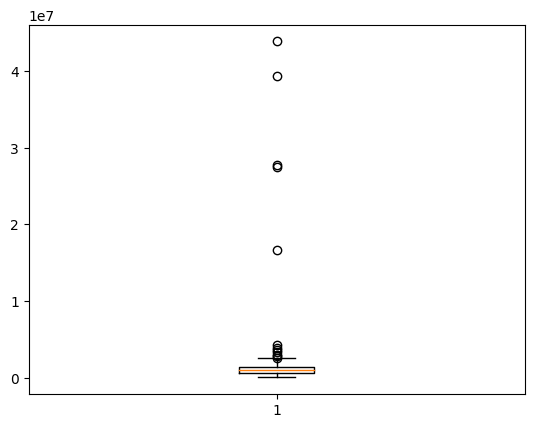

In [23]:
plt.boxplot(dedup_counts.dedup_count)

In [24]:
dedup_subset = dedup_counts.loc[dedup_counts.dedup_count < 10000000]

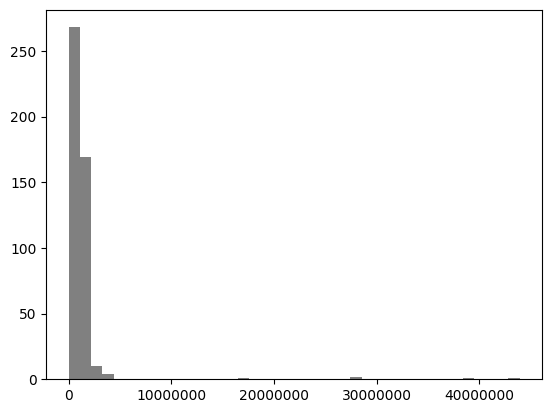

In [25]:
fig, ax = plt.subplots()
ax.hist(dedup_counts.dedup_count, bins = 40, color = 'gray')
ax.ticklabel_format(style='plain')

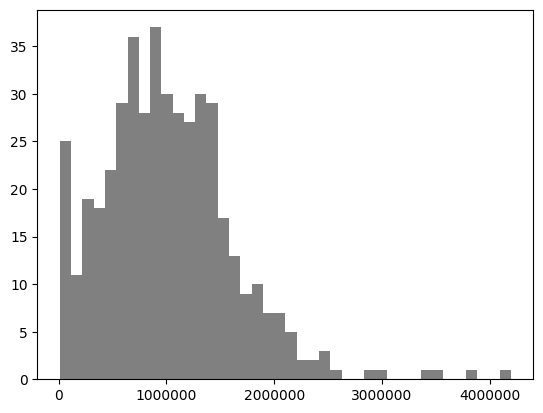

In [26]:
fig, ax = plt.subplots()
ax.hist(dedup_subset.dedup_count, bins = 40, color = 'gray')
ax.ticklabel_format(style='plain')

### Trimming reads

In [167]:
%%time
%%bash
cd ./data/raw/merged
> qFilt
for file in *.dedup; do
echo "cutadapt -q 15,15 -m 25 -o ${file/.tr0/}.trim $file > ${file}.trimlog.txt" >> qFilt; done
bash qFilt

CPU times: user 47.7 ms, sys: 20.9 ms, total: 68.6 ms
Wall time: 32min 56s


##### Quality filtered counts `trim_count`

In [38]:
%%time
%%bash
DATA_DIRECTORY="./data/raw/merged"
./scripts/count_trims.sh $DATA_DIRECTORY

101: 1592170 
103LC: 1124236 
105: 1089948 
105LC: 1269379 
107LC: 1309195 
109: 1368835 
109LC: 1251287 
111LC: 1374662 
113: 1733763 
116: 865366 
117LC: 1071807 
120LC: 275871 
120RE: 898922 
122LC-conc: 1502607 
123: 1167020 
125LC: 823041 
128LC: 1458152 
130: 1773160 
131: 1094442 
131LC: 1506574 
134LC: 680389 
136LC: 1420323 
138LC: 1247079 
139LC: 919132 
141: 1267646 
143LC: 1116103 
146LC: 1316801 
147LC: 1401861 
149LC: 927671 
151LC: 1329483 
153LC: 1392314 
201RE: 447440 
204LC: 1603385 
206LC: 1147138 
401: 1558690 
801RE: 1432983 
802: 2440935 
803RE: 1079877 
804: 1533474 
805: 1953237 
806: 2148131 
806replicate: 1707412 
807RE: 1523869 
808: 903962 
810: 2881390 
811: 2439640 
812RE: 1305594 
813RE: 656088 
814: 2217312 
815RE: 837561 
816: 1051136 
817RE: 1806779 
818RE: 907624 
819: 962197 
820: 562885 
822RE: 1845209 
823RE: 1405308 
824: 721211 
825RE: 1167333 
826RE: 940497 
827: 1030281 
828RE: 673826 
829: 1307455 
830: 542658 
831: 2294097 
832: 522937 
834RE

In [39]:
trim_counts = pd.read_csv('./data/results/trim_counts.csv')

##### Counts table

In [45]:
dedup_counts.merge(trim_counts, on='id').to_csv('./data/results/counts_master.csv', index=False)